<a href="https://colab.research.google.com/github/indrikwijaya/Approaching-Any-ML-Problem/blob/master/1_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codes to sync the folder with github

Source can be found [here](https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d)

In [ ]:
# 1. mount gdrive to gcolab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Approaching-Any-ML-Problem

/content/drive/MyDrive/Colab Notebooks/Approaching-Any-ML-Problem


# Cross-validation

- a step in the process of building a ML model which helps us ensure that our models fit the data accurately and also ensures that we don't overfit



## What is overfitting?

Look at `red wine quality dataset`. There are 11 attributes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Based on these attributes, we want to predict the quality of red wine ($1 \leq x \leq 10$)

In [30]:
import pandas as pd

df = pd.read_csv('data/winequality-red.csv')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
df.shape

(1599, 12)

In [31]:
set(df['quality'])

{3, 4, 5, 6, 7, 8}

For simplicity, let's choose this as a classification problem. This dataset, however, consists of only 6 types of quality values, $1-5$.


In [32]:
# encode quality_mapping
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:, 'quality'] = df.quality.map(quality_mapping)

Let's start with something simple such as `decision tree` that we can visualize too. We begin by dividing the data into training and test set

In [34]:
# use sample w/ frac=1 to shuffle the dataframe
# reset the indices since they change after
df = df.sample(frac=1).reset_index(drop=True)

# get top 1000 rows for training
df_train = df.head(1000)

df_test = df.tail(599)

## Training-Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
# initialize decision tree classifier 
clf = DecisionTreeClassifier(max_depth=3)

# choose columns for training as features
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

clf.fit(df_train[cols], df_train.quality)      

DecisionTreeClassifier(max_depth=3)

Test the accuracy of the model 

In [39]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate accuracy on train set
train_accuracy = accuracy_score(df_train.quality, train_predictions)

train_accuracy

0.598

In [40]:
# calculate accuracy on test set
test_accuracy = accuracy_score(df_test.quality, test_predictions)
test_accuracy

0.5225375626043406

Change `max_depth` to 7

In [41]:
# initialize decision tree classifier 
clf = DecisionTreeClassifier(max_depth=7)

# choose columns for training as features
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

clf.fit(df_train[cols], df_train.quality)      

# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate accuracy on train set
train_accuracy = accuracy_score(df_train.quality, train_predictions)

print(train_accuracy)

# calculate accuracy on test set
test_accuracy = accuracy_score(df_test.quality, test_predictions)
print(test_accuracy)

0.78
0.5709515859766278


This gives training accuracy of 76.6% and test accuracy of 57.3%. Here, we have used accuracy, mainly because it is the most straightforward metric. It might not be the best metric for this problem. What about we calculate these accuracies for different values of `max_depth` and make a plot?

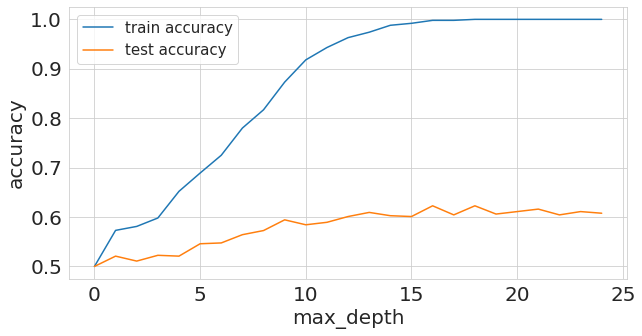

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
# init the model
  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(df_train[cols], df_train.quality)

  # create training & test predictions
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  # calculate training & test accuracies
  train_accuracy = accuracy_score(df_train.quality, train_predictions)
  test_accuracy = accuracy_score(df_test.quality, test_predictions)
  # append accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

- Training accuracy keeps increasing yet test accuracy remains the same or even gets worse
- Our simple decisiont ree model keeps learning about the training data better and better with an increase in `max_depth`, but the performance on test data doesn't improve at all -> **OVERFITTING**
- Model works well on training data but will not generalize well on unseen samples
- *Another definition of overfitting: when the test loss increases as we keep improving training loss*

<img src = 'https://vitalflux.com/wp-content/uploads/2020/12/overfitting-and-underfitting-wrt-model-error-vs-complexity-300x173.png'/>

Solution: Cross-validation!

Different types of CV:
- k-fold CV
- stratified k-fold CV
- hold-out based validation
- leave-one-out CV
- group k-fold CV

## Different kind of CV

k-fold cv

<img src="https://amueller.github.io/aml/_images/kfold_cv.png"/>

In [ ]:
from sklearn.model_selection import KFold
# Kfold
if __name__ == "__main__":
  # Training data is in a CSV file called train.csv
  df = pd.read_csv("train.csv")
  # we create a new column called kfold and fill it with -1
  df["kfold"] = -1
  # the next step is to randomize the rows of the data
  df = df.sample(frac=1).reset_index(drop=True)
  # initiate the kfold class from model_selection module
  kf = KFold(n_splits=5)
  # fill the new kfold column
  for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
  # save the new csv with kfold column
  df.to_csv("train_folds.csv", index=False)

Stratified k-fold

If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, you don't want to use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this can result in folds with all negative samples. In these cases, we prefer using stratified k-fold cross-validation. Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So, in each fold, you will have the same 90% positive and 10% negative samples. Thus, whatever metric you choose to evaluate, it will give similar results across all folds.

<img src="https://amueller.github.io/aml/_images/stratified_cv.png">

In [ ]:
from sklearn.model_selection import StratifiedKFold
if __name__ == "__main__":
  # Training data is in a csv file called train.csv
  df = pd.read_csv("train.csv")
  # we create a new column called kfold and fill it with -1
  df["kfold"] = -1
  # the next step is to randomize the rows of the data
  df = df.sample(frac=1).reset_index(drop=True)
  # fetch targets
  y = df.target.values
  # initiate the kfold class from model_selection module
  kf = StratifiedKFold(n_splits=5)
  # fill the new kfold column
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  # save the new csv with kfold column
  df.to_csv("train_folds.csv", index=False)

For the wine dataset, let's look at the distribution of labels

Text(0, 0.5, 'count')

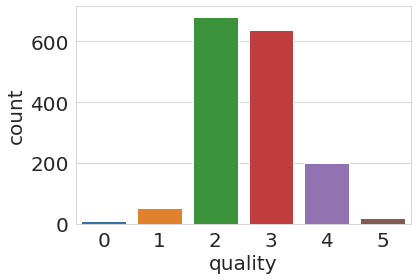

In [46]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

- skewed distribution -> choose `StratifiedKFold`
- rule of thumb: if it's a standard *classification* problem, choose `StratifiedKFold`

**Hold-out**

But what should we do if we have a large amount of data? Suppose we have 1
million samples. A 5 fold cross-validation would mean training on 800k samples and validating on 200k. Depending on which algorithm we choose, training and even validation can be very expensive for a dataset which is of this size. In these cases, we can opt for a hold-out based validation.
The process for creating the hold-out remains the same as stratified k-fold. For a dataset which has 1 million samples, we can create ten folds instead of 5 and keep one of those folds as hold-out. This means we will have 100k samples in the holdout, and we will always calculate loss, accuracy and other metrics on this set and train on 900k samples.

Hold-out is also used very frequently with time-series data. Let’s assume the problem we are provided with is predicting sales of a store for 2020, and you are provided all the data from 2015-2019. In this case, you can select all the data for 2019 as a hold-out and train your model on all the data from 2015 to 2018.

Suppose we're to predict the sales from time step 31 to 40 given data from time step 0 to 40. We can then keep 21 to 30 as hold-out and train our model from step 0 to step 20. We should also note that when we're predicting from 31 to 40, we should include the data from 21 to 30 in our model; otherwise, performance will be sub-par.

In any case, we have to deal with small datasets and creating big validation sets means losing a lot of data for the model to learn. In those cases, we can opt for a type of k-fold cross-validation where k=N, where N is the number of samples in the dataset. This means that in all folds of training, we will be training on all data samples except 1. The number of folds for this type of cross-validation is the same as the number of samples that we have in the dataset.

One should note that this type of cross-validation can be costly in terms of the time it takes if the model is not fast enough, but since it’s only preferable to use this cross-validation for small datasets, it doesn’t matter much. 

Now we can move to regression. The good thing about regression problems is that we can use all the cross-validation techniques mentioned above for regression problems except for stratified k-fold. That is we cannot use stratified k-fold directly, but there are ways to change the problem a bit so that we can use stratified k-fold for regression problems. Mostly, simple k-fold cross-validation works for any regression problem. However, if you see that the distribution of targets is not
consistent, you can use stratified k-fold.

To use stratified k-fold for a regression problem, we have first to divide the target into bins, and then we can use stratified k-fold in the same way as for classification problems. There are several choices for selecting the appropriate number of bins. If you have a lot of samples( > 10k, > 100k), then you don’t need to care about the number of bins. Just divide the data into 10 or 20 bins. If you do not have a lot of samples, you can use a simple rule like `Sturge’s Rule` to calculate the appropriate
number of bins.

Sturge's rule:
$ \text{Number of Bins} = 1 + log_2(N)$

In [50]:
from sklearn.datasets import make_regression
import numpy as np

def create_folds(data):
  # we create a new column called kfold and fill it with -1
  data["kfold"] = -1
  # the next step is to randomize the rows of the data
  data = data.sample(frac=1).reset_index(drop=True)
  
  # calculate the number of bins by Sturge's rule
  # Either floor or round
  num_bins = int(np.floor(1 + np.log2(len(data))))
  
  # bin targets
  data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)
  
  # initiate the kfold class from model_selection module
  kf = StratifiedKFold(n_splits=5)
  
  # fill the new kfold column
  # note that, instead of targets, we use bins!
  for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
    data.loc[v_, 'kfold'] = f
  
  # drop the bins column
  data = data.drop("bins", axis=1)
  # return dataframe with folds
  return data

In [53]:
if __name__ == "__main__":
  # create a sample dataset with 15000 samples, 100 features, 1 target
  X, y = make_regression(n_samples=15000, n_features=100, n_targets=1)

  df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])

  df.loc[:, 'target'] = y

  # create folds
  df = create_folds(df)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


We must keep in mind that cross-validation also depends a lot on the data and you might need to adopt new forms of cross-validation depending on your problem and data.

For example, let’s say we have a problem in which we would like to build a model to detect skin cancer from skin images of patients. Our task is to build a binary classifier which takes an input image and predicts the probability for it being benign or malignant.

In these kinds of datasets, you might have multiple images for the same patient in the training dataset. So, to build a good cross-validation system here, you must have stratified k-folds, but you must also make sure that patients in training data do not appear in validation data. Fortunately, scikit-learn offers a type of cross-validation known as GroupKFold. Here the patients can be considered as groups. But unfortunately, there is no way to combine GroupKFold with StratifiedKFold in scikit-learn. 